##### MODEL TRAINING

1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

2. Load Dataset

In [2]:
data = pd.read_csv("data.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


3. Exploratory Data Analysis (EDA)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


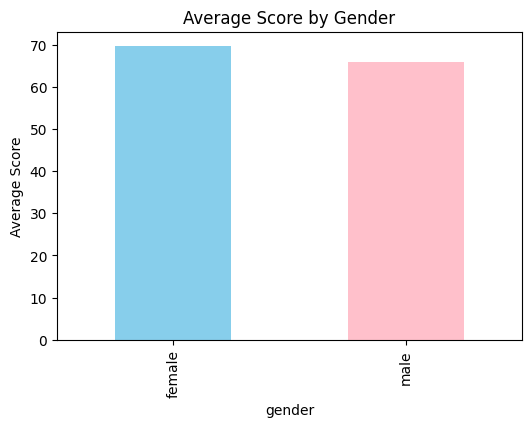

In [3]:
print(data.isnull().sum())

data['average_score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)

plt.figure(figsize=(6,4))
data.groupby('gender')['average_score'].mean().plot(kind='bar', color=['skyblue', 'pink'])
plt.title("Average Score by Gender")
plt.ylabel("Average Score")
plt.show()

4. Preprocessing

In [4]:
data['gender'] = data['gender'].map({'male':0, 'female':1})
data['lunch'] = data['lunch'].map({'standard':1, 'free/reduced':0})
data['test preparation course'] = data['test preparation course'].map({'completed':1, 'none':0})

X = data[['gender', 'lunch', 'test preparation course']]
y = data['average_score']

5. Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6. Train Linear Regression Model

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


7. Evaluate Model

In [7]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 198.46
R² Score: 0.07


8. Sample Predictions 

In [8]:
sample = X_test[:5]
predictions = model.predict(sample)

print("Sample Input:")
print(sample)
print("\nPredicted Average Scores:")
print(predictions)

Sample Input:
     gender  lunch  test preparation course
521       1      1                        0
737       1      0                        1
740       0      1                        0
660       0      0                        0
411       0      1                        1

Predicted Average Scores:
[70.49288362 69.57522974 66.21460794 56.9554328  74.55612921]


9. Visualize Predictions vs Actual

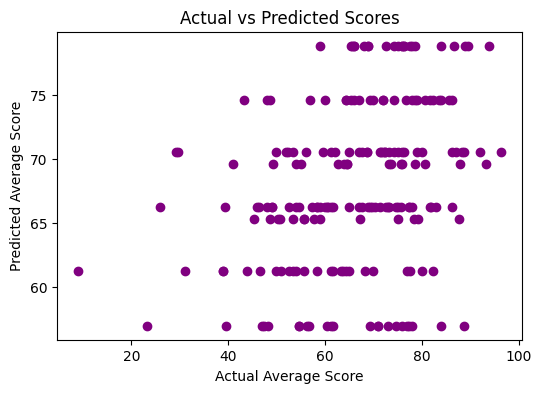

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Average Score")
plt.ylabel("Predicted Average Score")
plt.title("Actual vs Predicted Scores")
plt.show()